# Supplementary Figure: comparison of equi/SDP/ME/MVR group knockoffs for various covariance structures using marginal statistics



In [5]:
using DataFrames, CSV
using Plots
using LinearAlgebra
using Statistics
gr(fmt=:png);

global my_colors = ["gold", "orangered2", "mediumblue", "cyan3"];

## Helper functions to make plots

In [6]:
function summarize_ar(corr::Bool, n::Int)
    dir = corr ? "/home/groups/sabatti/group_knockoff_simulations/AR1_corr" :
        "/home/groups/sabatti/group_knockoff_simulations/AR1"
    equi_powers, equi_fdrs, equi_times, equi_ssums, equi_obj = [], [], [], [], []
    maxent_powers, maxent_fdrs, maxent_times, maxent_ssums, maxent_obj = [], [], [], [], []
    mvr_powers, mvr_fdrs, mvr_times, mvr_ssums, mvr_obj = [], [], [], [], []
    sdp_powers, sdp_fdrs, sdp_times, sdp_ssums, sdp_obj = [], [], [], [], []
    for seed in 1:100
        try
            result = CSV.read(joinpath(dir, "sim$seed", "n$(n)_marginal.csv"), DataFrame)
            push!(equi_powers, result[1, "power"]); push!(equi_fdrs, result[1, "fdr"])
            push!(sdp_powers, result[2, "power"]); push!(sdp_fdrs, result[2, "fdr"])
            push!(maxent_powers, result[3, "power"]); push!(maxent_fdrs, result[3, "fdr"])
            push!(mvr_powers, result[4, "power"]); push!(mvr_fdrs, result[4, "fdr"])
        catch
            continue
        end
    end
    println("n $n has $(length(equi_powers)) success")
    return equi_powers, maxent_powers, mvr_powers, sdp_powers, 
        equi_fdrs, maxent_fdrs, mvr_fdrs, sdp_fdrs
end
function make_plot_ar(corr::Bool; ns = 250:250:1000)
    equi_powers_mean, equi_fdrs_mean, equi_powers_std, equi_fdrs_std = [], [], [], []
    sdp_powers_mean, sdp_fdrs_mean, sdp_powers_std, sdp_fdrs_std = [], [], [], []
    maxent_powers_mean, maxent_fdrs_mean, maxent_powers_std, maxent_fdrs_std = [], [], [], []
    mvr_powers_mean, mvr_fdrs_mean, mvr_powers_std, mvr_fdrs_std = [], [], [], []
    
    # summarize results
    for n in ns
        equi_powers, maxent_powers, mvr_powers, sdp_powers, 
            equi_fdrs, maxent_fdrs, mvr_fdrs, sdp_fdrs = 
            summarize_ar(corr, n)
        push!(equi_powers_mean, mean(equi_powers)); push!(equi_powers_std, std(equi_powers))
        push!(equi_fdrs_mean, mean(equi_fdrs)); push!(equi_fdrs_std, std(equi_fdrs))
        push!(sdp_powers_mean, mean(sdp_powers)); push!(sdp_powers_std, std(sdp_powers))
        push!(sdp_fdrs_mean, mean(sdp_fdrs)); push!(sdp_fdrs_std, std(sdp_fdrs))
        push!(maxent_powers_mean, mean(maxent_powers)); push!(maxent_powers_std, std(maxent_powers))
        push!(maxent_fdrs_mean, mean(maxent_fdrs)); push!(maxent_fdrs_std, std(maxent_fdrs))
        push!(mvr_powers_mean, mean(mvr_powers)); push!(mvr_powers_std, std(mvr_powers))
        push!(mvr_fdrs_mean, mean(mvr_fdrs)); push!(mvr_fdrs_std, std(mvr_fdrs))
    end
    
    # power plot
    title = corr ? "AR1(corr)" : "AR1"
#     if !corr # only this plot has y labels
#         power_plt = plot(ns, equi_powers_mean, yerr=equi_powers_std, xtick=false, shape=:circle,
#             label="equi", w=2, ylim=(0, 1.0), title=title, markerstrokecolor=my_colors[1], 
#             capsize = 0, ylabel="Power", xlim=(200, 1050), color=my_colors[1])
#     else
#         power_plt = plot(ns, equi_powers_mean, yerr=equi_powers_std, xtick=false, shape=:circle,
#             label="equi", w=2, ylim=(0, 1.0), title=title, markerstrokecolor=my_colors[1], 
#             capsize = 0, xlim=(200, 1050), ytick=(0:0.2:1.0, ["","","","","",""]), color=my_colors[1])
#     end
    power_plt = plot(ns, equi_powers_mean, yerr=equi_powers_std, xtick=false, shape=:circle,
        label="equi", w=2, ylim=(0, 1.0), title=title, markerstrokecolor=my_colors[1], 
        capsize = 0, xlim=(200, 1050), ytick=(0:0.2:1.0, ["","","","","",""]), color=my_colors[1])
    plot!(ns, sdp_powers_mean, yerr=sdp_powers_std, label = "SDP", w=2, shape=:circle,
        markerstrokecolor=my_colors[2], capsize=0, color=my_colors[2])
    plot!(ns .- 5.5, maxent_powers_mean, yerr=maxent_powers_std, label = "ME", w=2, 
        shape=:circle, markerstrokecolor=my_colors[3], capsize = 0, color=my_colors[3])
    plot!(ns .+ 5.5, mvr_powers_mean, yerr=mvr_powers_std, label = "MVR", w=2, 
        shape=:circle, markerstrokecolor=my_colors[4], capsize = 0, color=my_colors[4])

    # FDR plots
#     if !corr # only this plot has y labels
#         fdr_plt = plot(ns, equi_fdrs_mean, yerr=equi_fdrs_std, color=my_colors[1],
#             label="equi", w=2, ylim=(0, 0.15), shape=:circle, 
#             markerstrokecolor=my_colors[1], xlim=(200, 1050), ylabel="Obs. FDR", xgrid=false)
#     else
#         fdr_plt = plot(ns, equi_fdrs_mean, yerr=equi_fdrs_std, color=my_colors[1],
#             label="equi", w=2, ylim=(0, 0.15), shape=:circle, 
#             markerstrokecolor=my_colors[1], xlim=(200, 1050),
#             ytick=(0:0.05:0.15, ["","","",""]), xgrid=false)
#     end
    fdr_plt = plot(ns, equi_fdrs_mean, yerr=equi_fdrs_std, color=my_colors[1],
        label="equi", w=2, ylim=(0, 0.15), shape=:circle, 
        markerstrokecolor=my_colors[1], xlim=(200, 1050),
        ytick=(0:0.05:0.15, ["","","",""]), xgrid=false)
    plot!(ns, sdp_fdrs_mean, label = "SDP", w=2, shape=:circle, 
        yerr=sdp_fdrs_std, markerstrokecolor=my_colors[2], color=my_colors[2])
    plot!(ns .- 5.5, maxent_fdrs_mean, label = "ME", w=2, shape=:circle, 
        yerr=maxent_fdrs_std, markerstrokecolor=my_colors[3], color=my_colors[3])
    plot!(ns .+ 5.5, mvr_fdrs_mean, label = "MVR", w=2, shape=:circle, 
        yerr=mvr_fdrs_std, markerstrokecolor=my_colors[4], color=my_colors[4])
    hline!(fdr_plt, [0.1], label = "target FDR", linestyle=:dot, w=2, 
        color=:black, legend=false, alpha=0.3)
    
    return power_plt, fdr_plt
end
function summarize_block_cov_vary_n(n::Int)
    dir = "/home/groups/sabatti/group_knockoff_simulations/block_cov/vary_n_marginal"
    equi_powers, equi_fdrs, equi_times, equi_ssums, equi_obj = [], [], [], [], []
    maxent_powers, maxent_fdrs, maxent_times, maxent_ssums, maxent_obj = [], [], [], [], []
    mvr_powers, mvr_fdrs, mvr_times, mvr_ssums, mvr_obj = [], [], [], [], []
    sdp_powers, sdp_fdrs, sdp_times, sdp_ssums, sdp_obj = [], [], [], [], []
    for seed in 1:100
        try
            result = CSV.read(joinpath(dir, "n$(n)", "sim$seed.csv"), DataFrame)
            push!(equi_powers, result[1, "power"]); push!(equi_fdrs, result[1, "fdr"])
            push!(maxent_powers, result[2, "power"]); push!(maxent_fdrs, result[2, "fdr"])
            push!(mvr_powers, result[3, "power"]); push!(mvr_fdrs, result[3, "fdr"])
            push!(sdp_powers, result[4, "power"]); push!(sdp_fdrs, result[4, "fdr"])
        catch
            continue
        end
    end
    println("n $n has $(length(equi_powers)) success")
    # save power/FDR result
    return equi_powers, maxent_powers, mvr_powers, sdp_powers, 
        equi_fdrs, maxent_fdrs, mvr_fdrs, sdp_fdrs
end
function block_cov_vary_n_plot(;ns = 250:250:1000)
    equi_powers_mean, equi_fdrs_mean, equi_powers_std, equi_fdrs_std = [], [], [], []
    sdp_powers_mean, sdp_fdrs_mean, sdp_powers_std, sdp_fdrs_std = [], [], [], []
    maxent_powers_mean, maxent_fdrs_mean, maxent_powers_std, maxent_fdrs_std = [], [], [], []
    mvr_powers_mean, mvr_fdrs_mean, mvr_powers_std, mvr_fdrs_std = [], [], [], []
    
    # summarize results
    for n in ns
        equi_powers, maxent_powers, mvr_powers, sdp_powers, 
            equi_fdrs, maxent_fdrs, mvr_fdrs, sdp_fdrs = 
            summarize_block_cov_vary_n(n)
        push!(equi_powers_mean, mean(equi_powers)); push!(equi_powers_std, std(equi_powers))
        push!(equi_fdrs_mean, mean(equi_fdrs)); push!(equi_fdrs_std, std(equi_fdrs))
        push!(sdp_powers_mean, mean(sdp_powers)); push!(sdp_powers_std, std(sdp_powers))
        push!(sdp_fdrs_mean, mean(sdp_fdrs)); push!(sdp_fdrs_std, std(sdp_fdrs))
        push!(maxent_powers_mean, mean(maxent_powers)); push!(maxent_powers_std, std(maxent_powers))
        push!(maxent_fdrs_mean, mean(maxent_fdrs)); push!(maxent_fdrs_std, std(maxent_fdrs))
        push!(mvr_powers_mean, mean(mvr_powers)); push!(mvr_powers_std, std(mvr_powers))
        push!(mvr_fdrs_mean, mean(mvr_fdrs)); push!(mvr_fdrs_std, std(mvr_fdrs))
    end
    
    # power plot
    title = "Block cov"
    power_plt = plot(ns, equi_powers_mean, yerr=equi_powers_std, xtick=false, shape=:circle,
        label="equi", w=2, ylim=(0, 1.0), title=title, markerstrokecolor=my_colors[1], 
        capsize = 0, ytick=0:0.2:1.0, xlim=(200, 1050), 
        color=my_colors[1], ylabel="Power")
    plot!(ns, sdp_powers_mean, yerr=sdp_powers_std, label = "SDP", w=2, 
        shape=:circle, markerstrokecolor=my_colors[2], color=my_colors[2], capsize = 0)
    plot!(ns .- 5.5, maxent_powers_mean, yerr=maxent_powers_std, label = "ME", w=2, 
        shape=:circle, markerstrokecolor=my_colors[3], color=my_colors[3], capsize = 0)
    plot!(ns .+ 5.5, mvr_powers_mean, yerr=mvr_powers_std, label = "MVR", w=2, 
        shape=:circle, markerstrokecolor=my_colors[4], color=my_colors[4], capsize = 0)

    # FDR plots
    fdr_plt = plot(ns, equi_fdrs_mean, yerr=equi_fdrs_std, 
        label="equi", w=2, ylim=(0, 0.15), shape=:circle, markerstrokecolor=my_colors[1],
        xlim=(200, 1050), ytick=0:0.05:0.15, xgrid=false, 
        color=my_colors[1], ylabel="Obs. FDR")
    plot!(ns, sdp_fdrs_mean, label = "SDP", w=2, shape=:circle, yerr=sdp_fdrs_std, 
        markerstrokecolor=my_colors[2], color=my_colors[2])
    plot!(ns .- 5.5, maxent_fdrs_mean, label = "ME", w=2, shape=:circle, yerr=maxent_fdrs_std, 
        markerstrokecolor=my_colors[3], color=my_colors[3])
    plot!(ns .+ 5.5, mvr_fdrs_mean, label = "MVR", w=2, shape=:circle, yerr=mvr_fdrs_std, 
        markerstrokecolor=my_colors[4], color=my_colors[4])
    hline!(fdr_plt, [0.1], label = "target FDR", linestyle=:dot, alpha=0.3, w=2, color=:black, legend=false)
    
    # add annotation for x label (if I add actual xlabel, the dimensions of subplots are scaled)
#     annotate!(fdr_plt, 600, 0.0, "Sample size", :black)
    
    return power_plt, fdr_plt
end
function summarize_er(cov::Bool, n::Int)
    dir = cov ? "/home/groups/sabatti/group_knockoff_simulations/ER_cov" :
        "/home/groups/sabatti/group_knockoff_simulations/ER_prec"
    equi_powers, equi_fdrs, equi_times, equi_ssums, equi_obj = [], [], [], [], []
    maxent_powers, maxent_fdrs, maxent_times, maxent_ssums, maxent_obj = [], [], [], [], []
    mvr_powers, mvr_fdrs, mvr_times, mvr_ssums, mvr_obj = [], [], [], [], []
    sdp_powers, sdp_fdrs, sdp_times, sdp_ssums, sdp_obj = [], [], [], [], []
    for seed in 1:100
        try
            result = CSV.read(joinpath(dir, "n$(n)_marginal", "sim$seed.csv"), DataFrame)
            push!(equi_powers, result[1, "power"]); push!(equi_fdrs, result[1, "fdr"])
            push!(sdp_powers, result[2, "power"]); push!(sdp_fdrs, result[2, "fdr"])
            push!(maxent_powers, result[3, "power"]); push!(maxent_fdrs, result[3, "fdr"])
            push!(mvr_powers, result[4, "power"]); push!(mvr_fdrs, result[4, "fdr"])
        catch
            continue
        end
    end
    println("n $n has $success success")
    return equi_powers, maxent_powers, mvr_powers, sdp_powers, 
        equi_fdrs, maxent_fdrs, mvr_fdrs, sdp_fdrs
end
function make_plot_er(cov::Bool; ns = 250:250:1000)
    equi_powers_mean, equi_fdrs_mean, equi_powers_std, equi_fdrs_std = [], [], [], []
    sdp_powers_mean, sdp_fdrs_mean, sdp_powers_std, sdp_fdrs_std = [], [], [], []
    maxent_powers_mean, maxent_fdrs_mean, maxent_powers_std, maxent_fdrs_std = [], [], [], []
    mvr_powers_mean, mvr_fdrs_mean, mvr_powers_std, mvr_fdrs_std = [], [], [], []

    # summarize results
    for n in ns
        equi_powers, maxent_powers, mvr_powers, sdp_powers, 
            equi_fdrs, maxent_fdrs, mvr_fdrs, sdp_fdrs = 
            summarize_er(cov, n)
        push!(equi_powers_mean, mean(equi_powers)); push!(equi_powers_std, std(equi_powers))
        push!(equi_fdrs_mean, mean(equi_fdrs)); push!(equi_fdrs_std, std(equi_fdrs))
        push!(sdp_powers_mean, mean(sdp_powers)); push!(sdp_powers_std, std(sdp_powers))
        push!(sdp_fdrs_mean, mean(sdp_fdrs)); push!(sdp_fdrs_std, std(sdp_fdrs))
        push!(maxent_powers_mean, mean(maxent_powers)); push!(maxent_powers_std, std(maxent_powers))
        push!(maxent_fdrs_mean, mean(maxent_fdrs)); push!(maxent_fdrs_std, std(maxent_fdrs))
        push!(mvr_powers_mean, mean(mvr_powers)); push!(mvr_powers_std, std(mvr_powers))
        push!(mvr_fdrs_mean, mean(mvr_fdrs)); push!(mvr_fdrs_std, std(mvr_fdrs))
    end

    # power plot
    title = cov ? "ER(cov)" : "ER(prec)"
    power_plt = plot(ns, equi_powers_mean, yerr=equi_powers_std, xtick=false, shape=:circle,
        label="equi", w=2, ylim=(0, 1.0), title=title, markerstrokecolor=my_colors[1], color=my_colors[1],
        capsize = 0, xlim=(200, 1050), ytick=(0:0.2:1.0, ["","","","","",""]))
    plot!(ns, sdp_powers_mean, yerr=sdp_powers_std, label = "SDP", w=2, shape=:circle, 
        markerstrokecolor=my_colors[2], color=my_colors[2], capsize = 0)
    plot!(ns .- 5.5, maxent_powers_mean, yerr=maxent_powers_std, label = "ME", w=2, 
        shape=:circle, markerstrokecolor=my_colors[3], color=my_colors[3], capsize = 0)
    plot!(ns .+ 5.5, mvr_powers_mean, yerr=mvr_powers_std, label = "MVR", w=2, 
        shape=:circle, markerstrokecolor=my_colors[4], color=my_colors[4], capsize = 0)
    
    # FDR plots
    fdr_plt = plot(ns, equi_fdrs_mean, yerr=equi_fdrs_std, 
        label="equi", w=2, ylim=(0, 0.15), shape=:circle, markerstrokecolor=my_colors[1], 
        xlim=(200, 1050), ytick=(0:0.05:0.15, ["","","",""]), xgrid=false, color=my_colors[1])
    plot!(ns, sdp_fdrs_mean, label = "SDP", w=2, shape=:circle, yerr=sdp_fdrs_std, 
        markerstrokecolor=my_colors[2], color=my_colors[2])
    plot!(ns .- 5.5, maxent_fdrs_mean, label = "ME", w=2, shape=:circle, 
        yerr=maxent_fdrs_std, markerstrokecolor=my_colors[3], color=my_colors[3])
    plot!(ns .+ 5.5, mvr_fdrs_mean, label = "MVR", w=2, shape=:circle, 
        yerr=mvr_fdrs_std, markerstrokecolor=my_colors[4], color=my_colors[4])
    hline!(fdr_plt, [0.1], label = "target FDR", linestyle=:dot, w=2, 
        color=:black, legend=false, alpha=0.3)
    
    return power_plt, fdr_plt
end

make_plot_er (generic function with 1 method)

## Make plots

In [7]:
# block cov (vary n)
block_power_plt, block_fdr_plt = block_cov_vary_n_plot()

# ER(cov)
ER_cov_power_plt, ER_cov_fdr_plt = make_plot_er(true)

# ER(prec)
ER_prec_power_plt, ER_prec_fdr_plt = make_plot_er(false)

# AR1
AR1_power_plt, AR1_fdr_plt = make_plot_ar(false)

# AR1(corr)
AR1_corr_power_plt, AR1_corr_fdr_plt = make_plot_ar(true);

n 250 has 100 success
n 500 has 100 success
n 750 has 100 success
n 1000 has 100 success
n 250 has success success
n 500 has success success
n 750 has success success
n 1000 has success success
n 250 has success success
n 500 has success success
n 750 has success success
n 1000 has success success
n 250 has 100 success
n 500 has 100 success
n 750 has 100 success
n 1000 has 100 success
n 250 has 100 success
n 500 has 100 success
n 750 has 100 success
n 1000 has 100 success


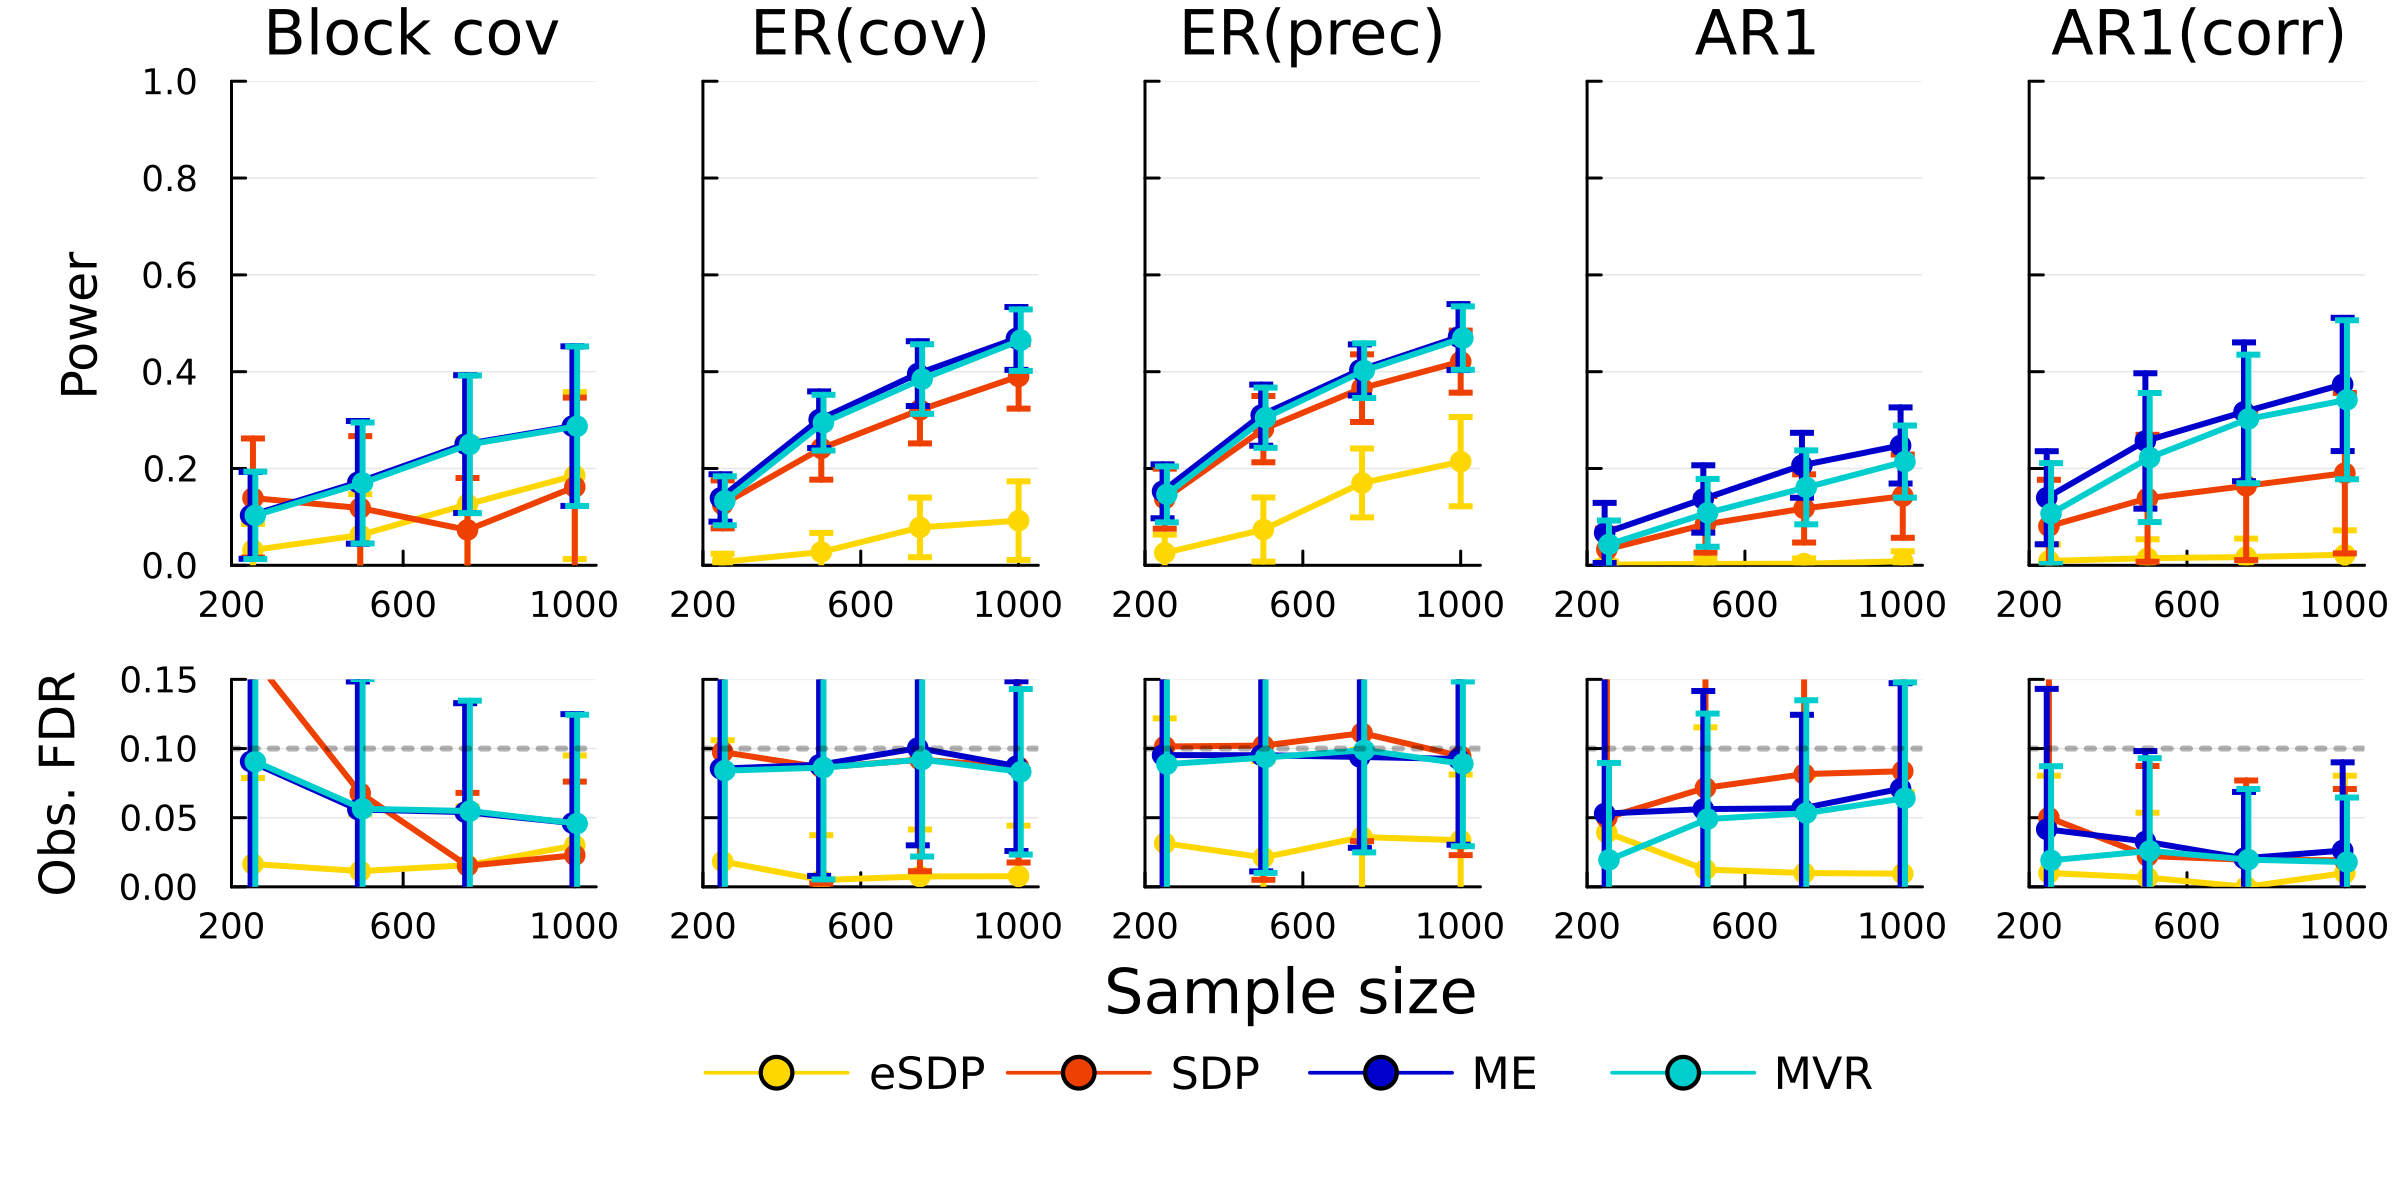

┌ Warning: n° of legend_column=5 is larger than n° of series=4
└ @ Plots /home/groups/sabatti/.julia/packages/Plots/rz1WP/src/backends/gr.jl:1235
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [8]:
# block cov plot (with y labels)
left_plt = plot(block_power_plt, block_fdr_plt, left_margin=5Plots.mm, xtick=[200, 600, 1000],
    xgrid=false, layout = grid(2, 1, heights=[0.7 ,0.3]), dpi=300)

# other covariances (no y labels)
right_plt = plot(ER_cov_power_plt, ER_prec_power_plt, AR1_power_plt, AR1_corr_power_plt, 
    ER_cov_fdr_plt, ER_prec_fdr_plt, AR1_fdr_plt, AR1_corr_fdr_plt, 
    xgrid=false, xtick=[200, 600, 1000],
    layout = grid(2, 4, heights=[0.7 ,0.3]),size = (800, 400),dpi=300)
main_plt = plot(left_plt, right_plt, layout = grid(1, 2, widths=[0.18, 0.82]), legend=false)

# separate plot for legend
n = 5
labels = ["eSDP" "SDP" "ME" "MVR"]
shapes = [:circle :circle :circle :circle]
lstyles = [:solid :solid :solid :solid]
legend_plt = plot(2:n,2:n, lims=(0,1), legendfontsize=10, legend=:outerbottom, 
    legendcolumns=n, frame=:none, fg_color_legend = nothing, 
    label=labels[1], color=my_colors[1], markershapes=shapes[1], linestyle=lstyles[1])
plot!(legend_plt, 2:n, 2:n, label=labels[2], color=my_colors[2], markershapes=shapes[2], linestyle=lstyles[2])
plot!(legend_plt, 2:n, 2:n, label=labels[3], color=my_colors[3], markershapes=shapes[3], linestyle=lstyles[3])
plot!(legend_plt, 2:n, 2:n, label=labels[4], color=my_colors[4], markershapes=shapes[4], linestyle=lstyles[4])
# plot!(legend_plt, 2:n, 2:n, label="target FDR", color="black", alpha=0.3, w=2, linestyle=:dot)
annotate!(legend_plt, -2.2, -0.5, "Sample size", :black)

# combine all plots
all_plt = plot(main_plt, legend_plt, layout = grid(2, 1, heights=[0.87, 0.13]), dpi=300)

In [9]:
savefig(all_plt, "/home/users/bbchu/knockoffs/plots/marginal_stats.pdf")

┌ Warning: n° of legend_column=5 is larger than n° of series=4
└ @ Plots /home/groups/sabatti/.julia/packages/Plots/rz1WP/src/backends/gr.jl:1235
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


"/home/users/bbchu/knockoffs/plots/marginal_stats.pdf"

## Use $x'y$ as feature statistic

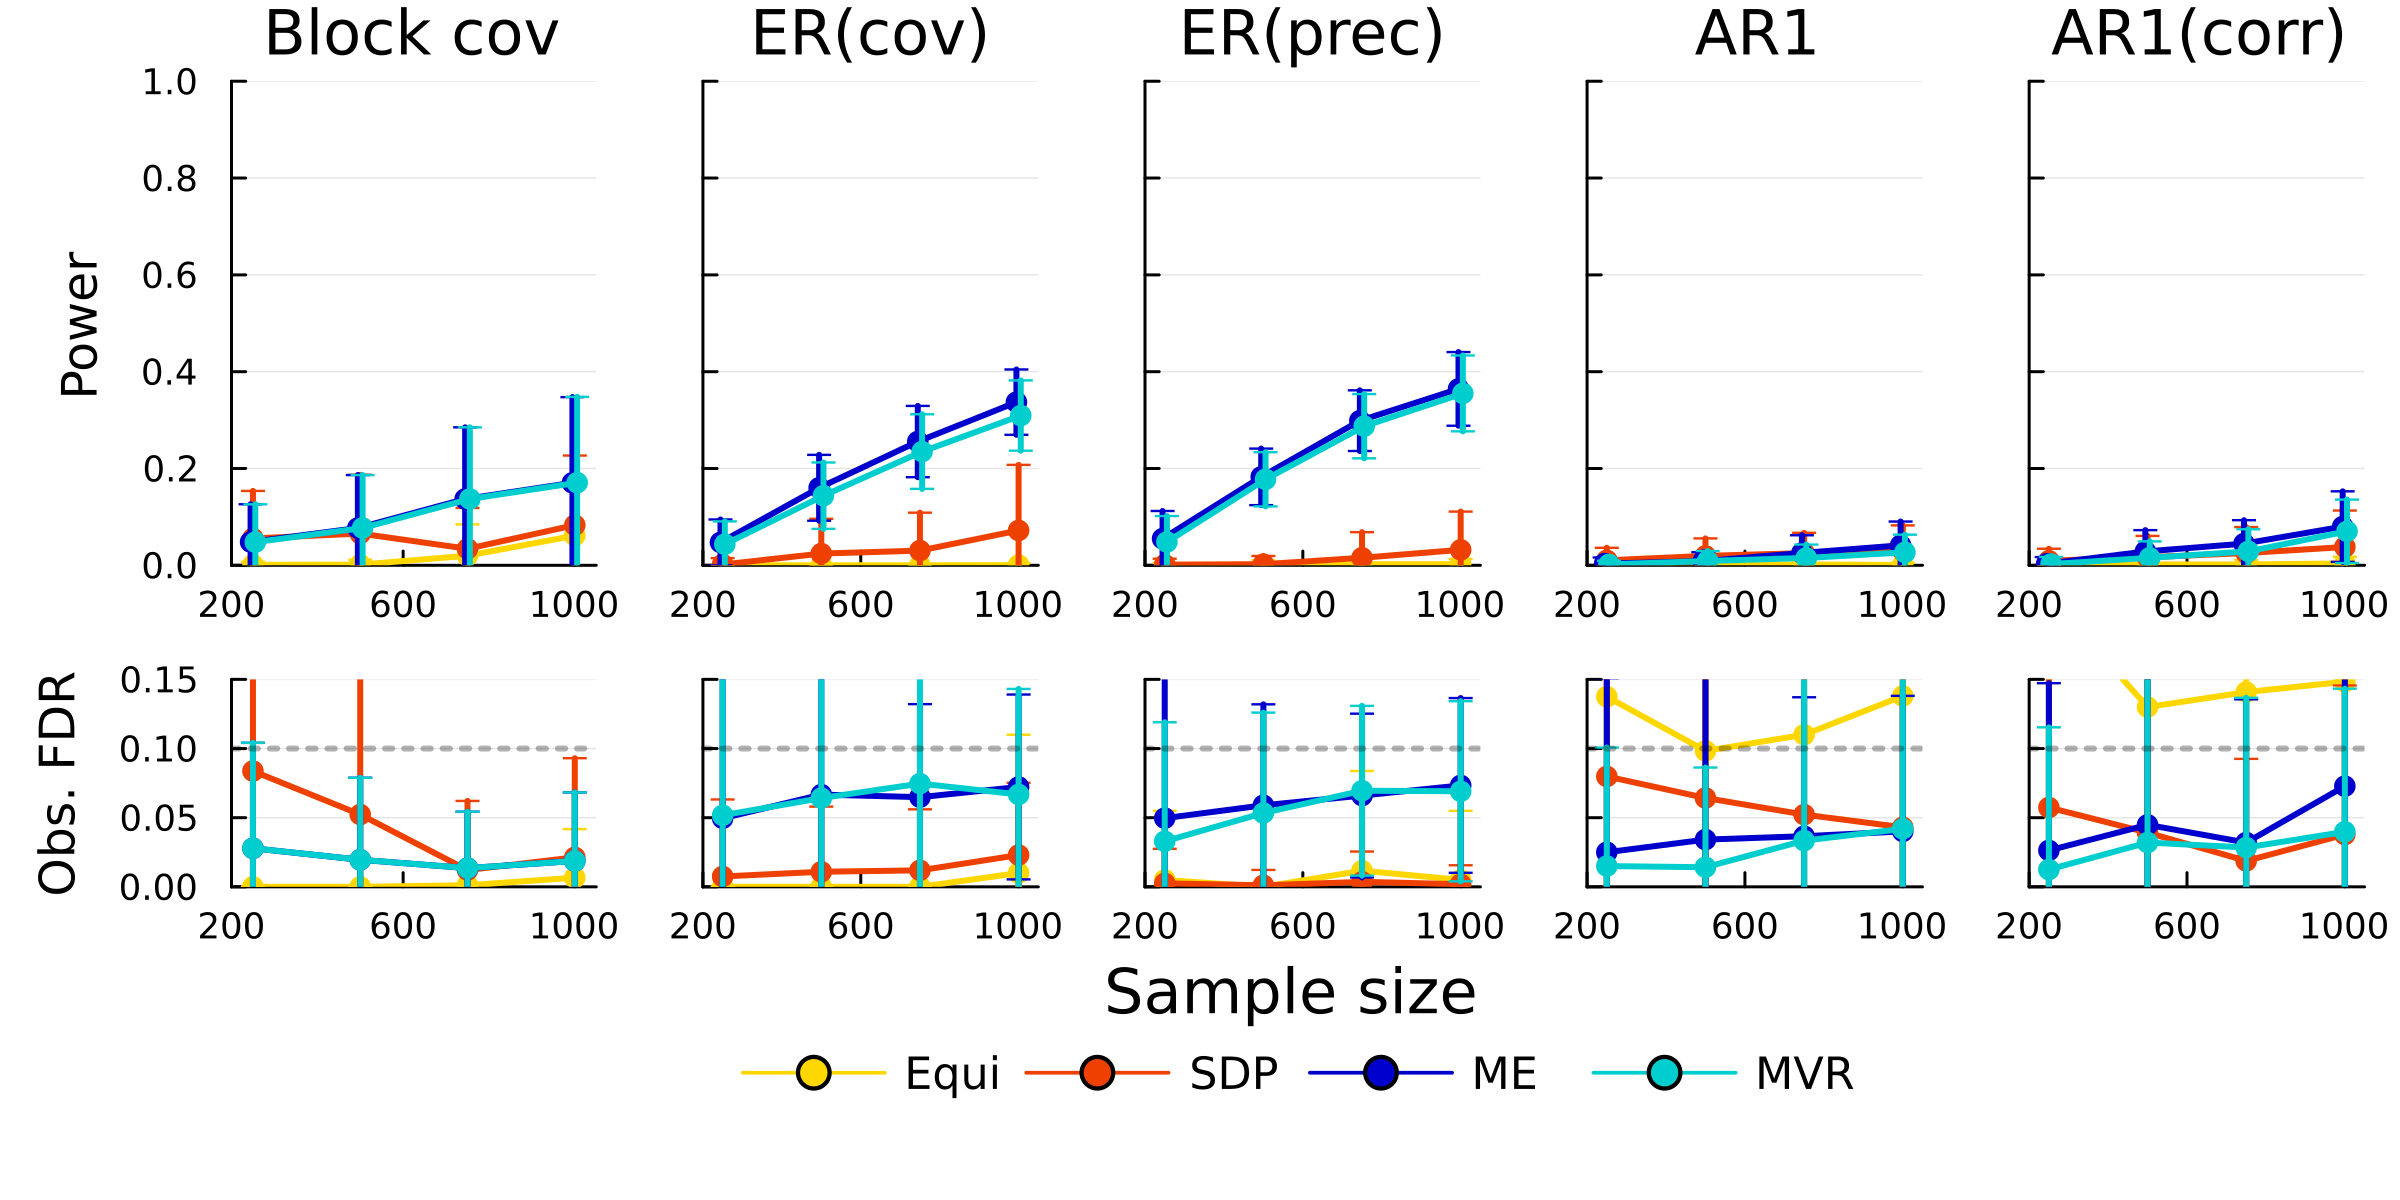

┌ Warning: n° of legend_column=5 is larger than n° of series=4
└ @ Plots /home/groups/sabatti/.julia/packages/Plots/esM5q/src/backends/gr.jl:1235
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [9]:
# block cov plot (with y labels)
left_plt = plot(block_power_plt, block_fdr_plt, left_margin=5Plots.mm, xtick=[200, 600, 1000],
    xgrid=false, layout = grid(2, 1, heights=[0.7 ,0.3]), dpi=300)

# other covariances (no y labels)
right_plt = plot(ER_cov_power_plt, ER_prec_power_plt, AR1_power_plt, AR1_corr_power_plt, 
    ER_cov_fdr_plt, ER_prec_fdr_plt, AR1_fdr_plt, AR1_corr_fdr_plt, 
    xgrid=false, xtick=[200, 600, 1000],
    layout = grid(2, 4, heights=[0.7 ,0.3]),size = (800, 400),dpi=300)
main_plt = plot(left_plt, right_plt, layout = grid(1, 2, widths=[0.18, 0.82]), legend=false)

# separate plot for legend
n = 5
labels = ["Equi" "SDP" "ME" "MVR"]
shapes = [:circle :circle :circle :circle]
lstyles = [:solid :solid :solid :solid]
legend_plt = plot(2:n,2:n, lims=(0,1), legendfontsize=10, legend=:outerbottom, 
    legendcolumns=n, frame=:none, fg_color_legend = nothing, 
    label=labels[1], color=my_colors[1], markershapes=shapes[1], linestyle=lstyles[1])
plot!(legend_plt, 2:n, 2:n, label=labels[2], color=my_colors[2], markershapes=shapes[2], linestyle=lstyles[2])
plot!(legend_plt, 2:n, 2:n, label=labels[3], color=my_colors[3], markershapes=shapes[3], linestyle=lstyles[3])
plot!(legend_plt, 2:n, 2:n, label=labels[4], color=my_colors[4], markershapes=shapes[4], linestyle=lstyles[4])
# plot!(legend_plt, 2:n, 2:n, label="target FDR", color="black", alpha=0.3, w=2, linestyle=:dot)
annotate!(legend_plt, -2.2, -0.5, "Sample size", :black)

# combine all plots
all_plt = plot(main_plt, legend_plt, layout = grid(2, 1, heights=[0.87, 0.13]), dpi=300)

In [10]:
savefig(all_plt, "/home/users/bbchu/knockoffs/plots/marginal_stats.pdf")

┌ Warning: n° of legend_column=5 is larger than n° of series=4
└ @ Plots /home/groups/sabatti/.julia/packages/Plots/esM5q/src/backends/gr.jl:1235
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


"/home/users/bbchu/knockoffs/plots/marginal_stats.pdf"